# Notebook pour l'animation des météores



Amélioration 

https://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/01-03-Construction-of-an-artificial-but-realistic-image.html


artificial image of Earth from satellites python

https://www.google.com/search?client=safari&rls=en&q=artificial+image+of+Earth+from+satellites+python&ie=UTF-8&oe=UTF-8

building detection from satellite images python code

Image la nuit
https://www.earthdata.nasa.gov/learn/backgrounders/nighttime-lights

artificial image of cities night from satellites python
https://up42.com/blog/introduction-optical-satellite-imagery

earth cities from space NASA (images)
https://eol.jsc.nasa.gov/SearchPhotos/photo.pl?mission=ISS016&roll=E&frame=27162    
For the citation see the website : https://eol.jsc.nasa.gov/FAQ

https://eol.jsc.nasa.gov/FAQ/#cloudMasks



In [19]:
#%matplotlib notebook 

# Importation des modules
import numpy as np
from scipy.integrate import odeint

from matplotlib import pyplot as plt
from matplotlib import animation

import random
from IPython.display import HTML

from PIL import Image






#  Animation Fakeor

fonction procurée par Nicolas rambeaux.

In [20]:
px_x = 50
px_y = 50

x0, y0 = int(px_x/2),int(px_y/2)
sig_x, sig_y = 3,3

sig_t = 2
mu = 15

Imax = 255

def fakeor(px_x,px_y, x0,y0, t, a0):
    a   = a0.copy()
    
    at = Imax*np.exp( - (t-mu)**2/(2*sig_t**2) )

    for x in np.arange(px_x):
        for y in np.arange(px_y):
            u = np.sqrt( ( (x-x0)/sig_x )**2 + ( (y-y0)/sig_y )**2)
            a[x,y] = (at-a0[x,y])*np.exp(-u/2)
            
    a_noise = 0
    
    a = a + a_noise + a0
    return a


# DEFILEMENT DE L'IMAGE

## Methode animate

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 0.1564945226917058 x 1.0 to 0.15428571428571428 x 1.0
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 108x700 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/n9/q1kdqk0n15q2nk1vcb03cxvc0000gn/T/tmpmczr8e37/temp.m4v


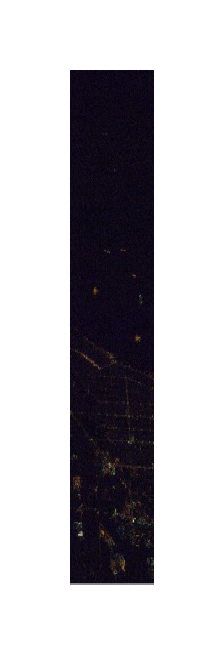

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image
import random

# Charger l'image
img_path = '/Users/ebennat/Downloads/M1Projet/Fakeor/Pictures/ISS016-E-27162.JPG'
img = np.asarray(Image.open(img_path))

# Paramètres pour le rognage
crop_width = 100  # Largeur du cadre de rognage (en pixels)

# Calculer le ratio d'aspect de l'image
aspect_ratio = img.shape[1] / img.shape[0]

# Initialisation de la figure avec la taille fixe
fig,ax = plt.subplots(figsize=(100 / img.shape[1], 436 / img.shape[0]), dpi=700)
ax.set_axis_off()
im = plt.imshow(img[:, 0:crop_width, :], cmap='viridis', interpolation='nearest', aspect='auto')

# Fonction d'initialisation
def init():
    im.set_data(img[:, 0:crop_width, :])
    return [im]
# Fonction d'animation
def animate(i):
    crop_start = i % (img.shape[1] - crop_width)
    cropped_frame = img[:, crop_start:crop_start + crop_width, :]

    # Mettre à jour l'image avec le cadre de rognage
    im.set_array(cropped_frame)
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=img.shape[1],
                               interval=50, blit=True, repeat=False)


HTML(anim.to_html5_video())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 0.1564945226917058 x 1.0 to 0.15428571428571428 x 1.0
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 108x700 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/n9/q1kdqk0n15q2nk1vcb03cxvc0000gn/T/tmp2gzye_8m/temp.m4v


0
1
2
3
4
5
6
7
8
9


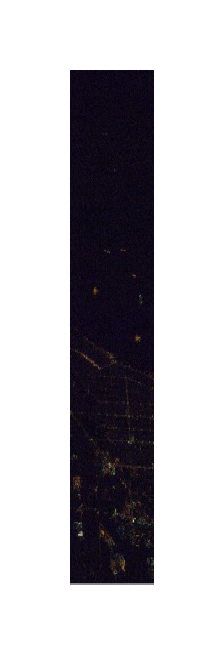

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image

# Charger l'image
img_path = '/Users/ebennat/Downloads/M1Projet/Fakeor/Pictures/ISS016-E-27162.JPG'
img = np.asarray(Image.open(img_path))
px_x = 100
px_y = 100
x0=50
y0=50

# Paramètres pour le rognage
crop_width = 100  # Largeur du cadre de rognage (en pixels)

# Calculer le ratio d'aspect de l'image
aspect_ratio = img.shape[1] / img.shape[0]

# Initialisation de la figure avec la taille fixe
fig,ax = plt.subplots(figsize=(100 / img.shape[1], 436 / img.shape[0]), dpi=700)
ax.set_axis_off()
im = plt.imshow(img[:, 0:crop_width, :], cmap='viridis', interpolation='nearest', aspect='auto')

# Fonction d'initialisation
def init():
    im.set_data(img[:, 0:crop_width, :])
    return [im]
# Fonction d'animation
def animate(i):
    crop_start = i % (img.shape[1] - crop_width)
    cropped_frame = img[:, crop_start:crop_start + crop_width, :]

    # Mettre à jour l'image avec le cadre de rognage

    im.set_array(cropped_frame)
    a = im.get_array()
    if i<10: 
        print(i)
        a = fakeor(px_x,px_y, x0+i,y0,i, cropped_frame)
    im.set_array(a)
    
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=img.shape[1],
                               interval=50, blit=True, repeat=False)


HTML(anim.to_html5_video())

# Défilement de l'image + Météore Position fixe

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 0.1564945226917058 x 1.0 to 0.15428571428571428 x 1.0
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 108x700 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/n9/q1kdqk0n15q2nk1vcb03cxvc0000gn/T/tmpk5prgcch/temp.m4v


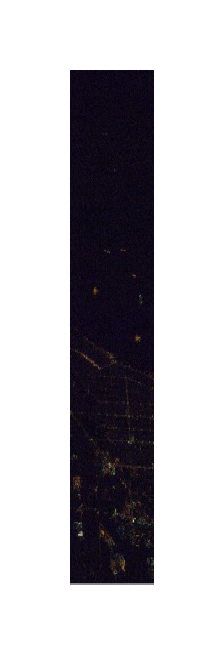

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image

# Charger l'image
img_path = '/Users/ebennat/Downloads/M1Projet/Fakeor/Pictures/ISS016-E-27162.JPG'  # Assurez-vous d'avoir le bon chemin d'accès
img = np.asarray(Image.open(img_path))

# Paramètres pour le rognage et le point lumineux
crop_width = 100  # Largeur du cadre de rognage (en pixels)
px_x, px_y = 50, 50  # Dimensions du point lumineux
sig_x, sig_y, sig_t, mu, Imax = 3, 3, 2, 15, 255  # Paramètres pour l'effet lumineux
random_frame = random.randint(0, 99)

# Initialisation de la figure
fig, ax = plt.subplots(figsize=(100 / img.shape[1], 436 / img.shape[0]), dpi=700)
ax.set_axis_off()
im = plt.imshow(img[:, 0:crop_width, :], cmap='viridis', interpolation='nearest', aspect='auto')

# Fonction d'initialisation
def init():
    im.set_data(img[:, 0:crop_width, :])
    return [im]

# Fonction d'animation
def animate(i):
    global px_x, px_y, x0, y0  # Assurez-vous que ces variables sont correctement définies ailleurs dans votre code
    crop_start = i % (img.shape[1] - crop_width)
    cropped_frame = img[:, crop_start:crop_start + crop_width, :].copy()

    # Integration de l'effet lumineux dans l'animation
    if random_frame <= i <= random_frame +20:  #le point lumineux apparaît entre les frames 10 et 30
        a0 = np.zeros_like(cropped_frame)  # Base pour l'effet, ajustée à la taille de cropped_frame
        lumineux = fakeor(px_x, px_y, x0, y0, i-random_frame, a0)  # Générez l'effet lumineux
        
        #Calcul des coordonnées de début pour cette sous-région
        centre_x, centre_y = crop_width // 2, cropped_frame.shape[0] // 2
        startX = max(centre_x - px_x // 2, 0)
        startY = max(centre_y - px_y // 2, 0)
        
        endX = min(startX + px_x, crop_width)
        endY = min(startY + px_y, cropped_frame.shape[0])

        # Appliquez l'effet lumineux à cette sous-région spécifique
        for c in range(3):  # Pour chaque canal de couleur
            cropped_frame[startY:endY, startX:endX, c] = np.clip(cropped_frame[startY:endY, startX:endX, c] + lumineux[:endY-startY, :endX-startX, c], 0, 255)

    # Mettre à jour l'image avec le cadre de rognage et l'effet lumineux
    im.set_array(cropped_frame)
    return [im]

# Création et exécution de l'animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=img.shape[1], interval=50, blit=True, repeat=False)
HTML(anim.to_html5_video())

## Position aléatoire 


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 0.1564945226917058 x 1.0 to 0.15428571428571428 x 1.0
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 108x700 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/n9/q1kdqk0n15q2nk1vcb03cxvc0000gn/T/tmpcwgrqj49/temp.m4v


1.5559938527893576e-10
5.83882385639616e-09
1.7063544532796593e-07
3.88364483490172e-06
6.883925183575686e-05
0.000950296558880061
0.010216650835202522
0.08554297011514052
0.5578102351366357
2.832794117251788
11.203918073968893
34.51049722533624
82.78637917637919
154.66531822672152
225.03671015907184
255.0
225.03671015907184
154.66531822672152
82.78637917637919
34.51049722533624
11.203918073968893


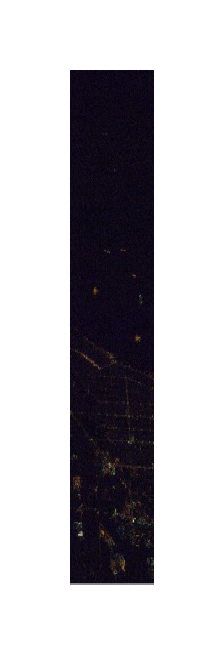

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image

# Charger l'image
img_path = '/Users/ebennat/Downloads/M1Projet/Fakeor/Pictures/ISS016-E-27162.JPG'  # Assurez-vous d'avoir le bon chemin d'accès
img = np.asarray(Image.open(img_path))

# Paramètres pour le rognage et le point lumineux
crop_width = 100  # Largeur du cadre de rognage (en pixels)
px_x, px_y = 50, 50  # Dimensions du point lumineux
sig_x, sig_y, sig_t, mu, Imax = 3, 3, 2, 15, 255  # Paramètres pour l'effet lumineux
centre_x = random.randint(0, crop_width - px_x)
centre_y = random.randint(0, img.shape[0] - px_y)



# Initialisation de la figure
fig, ax = plt.subplots(figsize=(100 / img.shape[1], 436 / img.shape[0]), dpi=700)
ax.set_axis_off()
im = plt.imshow(img[:, 0:crop_width, :], cmap='viridis', interpolation='nearest', aspect='auto')

# Fonction d'initialisation
def init():
    im.set_data(img[:, 0:crop_width, :])
    return [im]

# Fonction d'animation
def animate(i):
    global px_x, px_y, x0, y0  # Assurez-vous que ces variables sont correctement définies ailleurs dans votre code
    crop_start = i % (img.shape[1] - crop_width)
    cropped_frame = img[:, crop_start:crop_start + crop_width, :].copy()

    # Integration de l'effet lumineux dans l'animation
    if 10 <= i <= 30:  #le point lumineux apparaît entre les frames 10 et 30
        a0 = np.zeros_like(cropped_frame)  # Base pour l'effet, ajustée à la taille de cropped_frame
        lumineux = fakeor(px_x, px_y, x0, y0, i-10, a0)  # Générez l'effet lumineux
        
        #Calcul des coordonnées de début pour cette sous-région
     
        startX = max(centre_x - px_x // 2, 0)
        startY = max(centre_y - px_y // 2, 0)
        
        endX = min(startX + px_x, crop_width)
        endY = min(startY + px_y, cropped_frame.shape[0])

        # Appliquez l'effet lumineux à cette sous-région spécifique
        for c in range(3):  # Pour chaque canal de couleur
            cropped_frame[startY:endY, startX:endX, c] = np.clip(cropped_frame[startY:endY, startX:endX, c] + lumineux[:endY-startY, :endX-startX, c], 0, 255)

    # Mettre à jour l'image avec le cadre de rognage et l'effet lumineux
    im.set_array(cropped_frame)
    return [im]

# Création et exécution de l'animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=img.shape[1], interval=50, blit=True, repeat=False)
HTML(anim.to_html5_video())

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image
import time  

# Charger l'image
img_path = '/Users/ebennat/Downloads/M1Projet/Fakeor/Pictures/ISS016-E-27162.JPG'  
img = np.asarray(Image.open(img_path))
start_time = time.time()
print(start_time)
# Paramètres pour le rognage et le point lumineux
crop_width = 100  # Largeur du cadre de rognage (en pixels)
px_x, px_y = 50, 50  # Dimensions du point lumineux
sig_x, sig_y, sig_t, mu, Imax = 3, 3, 2, 15, 255  # Paramètres pour l'effet lumineux
centre_x = random.randint(0, crop_width - px_x)
centre_y = random.randint(0, img.shape[0] - px_y)


# Initialisation de la figure
fig, ax = plt.subplots(figsize=(100 / img.shape[1], 436 / img.shape[0]), dpi=700)
ax.set_axis_off()
im = plt.imshow(img[:, 0:crop_width, :], cmap='viridis', interpolation='nearest', aspect='auto')

# Fonction d'initialisation
def init():
    im.set_data(img[:, 0:crop_width, :])
    return [im]

# Fonction d'animation
def animate(i):
    global px_x, px_y, x0, y0  
    elapsed_time = time.time() - start_time
    crop_start = i % (img.shape[1] - crop_width)
    cropped_frame = img[:, crop_start:crop_start + crop_width, :].copy()

    if  <= i <= 80 :# Integration de l'effet lumineux dans l'animation
          
        a0 = np.zeros_like(cropped_frame)  # Base pour l'effet, ajustée à la taille de cropped_frame
        lumineux = fakeor(px_x, px_y, x0, y0, i-60, a0)  #effet lumineux
        
        #Calcul des coordonnées de début pour cette sous-région

        startX = max(centre_x - px_x // 2, 0)
        startY = max(centre_y - px_y // 2, 0)
        
        endX = min(startX + px_x, crop_width)
        endY = min(startY + px_y, cropped_frame.shape[0])
    
        
        for c in range(3):  # Pour chaque canal de couleur
            cropped_frame[startY:endY, startX:endX, c] = np.clip(cropped_frame[startY:endY, startX:endX, c] + lumineux[:endY-startY, :endX-startX, c], 0, 255)

    # Mettre à jour l'image avec le cadre de rognage et l'effet lumineux
    im.set_array(cropped_frame)
   
    return [im]


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=img.shape[1], interval=50, blit=True, repeat=False)
HTML(anim.to_html5_video())




SyntaxError: invalid syntax (<ipython-input-35-9a962a83ad50>, line 37)

In [32]:
px_x = 50
px_y = 50

x0, y0 = int(px_x/2),int(px_y/2)
sig_x, sig_y = 3,3

sig_t = 2
mu = 15

Imax = 255

def fakeor(px_x,px_y, x0,y0, t, a0):
    a   = a0.copy()
    
    at = Imax*np.exp( - (t-mu)**2/(2*sig_t**2) )
    print(at)

    for x in np.arange(px_x):
        for y in np.arange(px_y):
            u = np.sqrt( ( (x-x0)/sig_x )**2 + ( (y-y0)/sig_y )**2)
            a[x,y] = (at-a0[x,y])*np.exp(-u/2)
            
    a_noise = 0
    
    a = a + a_noise + a0
    return a

# Animation Météore fonction gaussienne pos et temps aléatoire


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 0.1564945226917058 x 1.0 to 0.15428571428571428 x 1.0
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 108x700 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/n9/q1kdqk0n15q2nk1vcb03cxvc0000gn/T/tmpwsy6dood/temp.m4v


1.5559938527893576e-10
5.83882385639616e-09
1.7063544532796593e-07
3.88364483490172e-06
6.883925183575686e-05
0.000950296558880061
0.010216650835202522
0.08554297011514052
0.5578102351366357
2.832794117251788
11.203918073968893
34.51049722533624
82.78637917637919
154.66531822672152
225.03671015907184
255.0
225.03671015907184
154.66531822672152
82.78637917637919
34.51049722533624
11.203918073968893


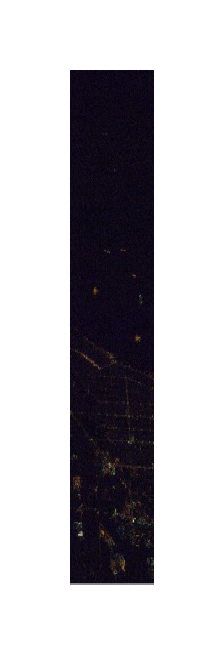

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image

# Charger l'image
img_path = '/Users/ebennat/Downloads/M1Projet/Fakeor/Pictures/ISS016-E-27162.JPG'  
img = np.asarray(Image.open(img_path))

# Paramètres pour le rognage et le point lumineux
crop_width = 100  # Largeur du cadre de rognage (en pixels)
px_x, px_y = 50, 50  # Dimensions du point lumineux
sig_x, sig_y, sig_t, mu, Imax = 3, 3, 2, 15, 255  # Paramètres pour l'effet lumineux
centre_x = random.randint(0, crop_width - px_x)
centre_y = random.randint(0, img.shape[0] - px_y)
random_frame = random.randint(0, 639)
vitesse = 5

def fakeor(px_x,px_y, x0,y0, t, a0):
    a   = a0.copy()
    
    at = Imax*np.exp( - (t-mu)**2/(2*sig_t**2) )
    print(at)

    for x in np.arange(px_x):
        for y in np.arange(px_y):
            u = np.sqrt( ( (x-x0)/sig_x )**2 + ( (y-y0)/sig_y )**2)
            a[x,y] = (at-a0[x,y])*np.exp(-u/2)
            
    a_noise = 0
    
    a = a + a_noise + a0
    return a

# Générer une direction aléatoire
angle = random.uniform(0, 2 * np.pi)  # Angle en radians
vitesse_x = vitesse * np.cos(angle)
vitesse_y = vitesse * np.sin(angle)

# Position initiale aléatoire dans le cadre visible
centre_x = random.randint(0, crop_width - px_x)
centre_y = random.randint(0, img.shape[0] - px_y)
 


# Initialisation de la figure
fig, ax = plt.subplots(figsize=(100 / img.shape[1], 436 / img.shape[0]), dpi=700)
ax.set_axis_off()
im = plt.imshow(img[:, 0:crop_width, :], cmap='viridis', interpolation='nearest', aspect='auto')

# Fonction d'initialisation
def init():
    im.set_data(img[:, 0:crop_width, :])
    return [im]

# Fonction d'animation
def animate(i):
    global px_x, px_y, x0, y0,centre_x, centre_y  
    crop_start = i % (img.shape[1] - crop_width)
    cropped_frame = img[:, crop_start:crop_start + crop_width, :].copy()

    # Integration de l'effet lumineux dans l'animation
    if random_frame <= i <= random_frame +20:
        centre_x += vitesse_x
        centre_y += vitesse_y
        a0 = np.zeros_like(cropped_frame)  # Base pour l'effet, ajustée à la taille de cropped_frame
        lumineux = fakeor(px_x, px_y, x0, y0, i-random_frame, a0)  # Générez l'effet lumineux
        
        
        #Calcul des coordonnées de début pour cette sous-région

        startX = int(max(centre_x - px_x // 2, 0))
        startY = int(max(centre_y - px_y // 2, 0))
        endX = int(min(startX + px_x, crop_width))
        endY = int(min(startY + px_y, cropped_frame.shape[0]))

        
        for c in range(3):  # Pour chaque canal de couleur
            cropped_frame[startY:endY, startX:endX, c] = np.clip(cropped_frame[startY:endY, startX:endX, c] + lumineux[:endY-startY, :endX-startX, c], 0, 255)

    # Mettre à jour l'image avec le cadre de rognage et l'effet lumineux
    im.set_array(cropped_frame)
   
    return [im]

# Création et exécution de l'animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=img.shape[1], interval=50, blit=True, repeat=False)
HTML(anim.to_html5_video())



# Acquisition données I et Mag

In [37]:
import numpy as np
import os
from astropy.table import QTable, Table
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

class AFMDataProcessor:
    def __init__(self):
        self.data = None

    def read_int(self, intfile):
        """Read AFM results."""
        if not os.path.isfile(intfile):
            msg = "*** FATAL ERROR: file:" + intfile + " does not exist"
            log.error(msg)
            raise IOError(msg)
        file_stat = os.stat(intfile)
        if file_stat.st_size < 1000:
            msg = "*** FATAL ERROR: file " + intfile + " does not seem to contain enough data"
            log.error(msg)
            raise IOError(msg)
        log.info("reading file: " + intfile)
        self.data = QTable.read(intfile, format='ascii.commented_header',
                                names=('Id', 'time', 'mass', 'radius', 'velocity',
                                       'altitude', 'zenith_angle', 'distance', 'Xm', 'Ym', 'T',
                                       'dm/dt', 'dr/dt', 'dv/dt', 'dh/dt', 'dz/dt',
                                       'dl/dt', 'dXm/dt', 'dYm/dt', 'dT/dt'))
                # putting the unit to get quantity objects
        
        return
       

    def compute_I(self, tau, v, dmdt):
        """Computes the brightness of a meteor."""
        
        I = np.where(np.abs(dmdt) < 1.0E-30, 0.0, -0.5 * tau * np.power(v, 2.0) * dmdt)
        return I

    def ItoIapp(self, I, r):
        """Get apparent brightness from intrinsic brightness and range."""
        I_app = I * (100000.0 / r) ** 2
        return I_app

    def ItoH(self, I):
        """Computes the absolute magnitude from Opik (1958)."""
        H = np.where(I < 1.0E-30, 99.9, 24.3 - 2.5 * np.log10(I * 1.0E+07))
        return H

    def process_dataI(self, tau, r):
        """Process the data to get magnitudes."""
        if self.data is None:
            raise ValueError("Data has not been loaded.")
        v = self.data['velocity']  # Assuming velocity is in km/s
        dmdt = self.data['dm/dt']
        I = self.compute_I(tau, v, dmdt)
        I_app = self.ItoIapp(I, r)
        Mag = self.ItoH(I_app)
        return I
    
    def process_dataMag(self, tau, r):
        """Process the data to get magnitudes."""
        if self.data is None:
            raise ValueError("Data has not been loaded.")
        v = self.data['velocity']  # Assuming velocity is in km/s
        dmdt = self.data['dm/dt']
        I = self.compute_I(tau, v, dmdt)
        I_app = self.ItoIapp(I, r)
        Mag = self.ItoH(I_app)
        return Mag

afm_processor = AFMDataProcessor()
#Replace with the actual file path
afm_processor.read_int('/Users/ebennat/Downloads/4NR/20_kms_E0.8_kg_55_deg/tables/STEPS_int.dat0')
tau = 0.1  # example of luminous efficiency
r = 100000  # example range in meters
mag = afm_processor.process_dataMag(tau, r)
I = afm_processor.process_dataI(tau, r)
print(I)
print(mag)


# Assumons que I est votre tableau de luminosités et que vous avez les temps correspondants dans `time`
time = afm_processor.data['time']
data_to_save = Table([time, I], names=['Time', 'Luminosity'])

# Définissez le chemin de sortie sur votre bureau
# Vous devrez peut-être ajuster le chemin selon votre système d'exploitation et votre nom d'utilisateur
output_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'luminosity_data.csv')

# Enregistrement du tableau dans un fichier CSV
data_to_save.write(output_path, format='csv', overwrite=True)

print(f"Le fichier a été enregistré avec succès à l'emplacement suivant : {output_path}")



INFO:__main__:reading file: /Users/ebennat/Downloads/4NR/20_kms_E0.8_kg_55_deg/tables/STEPS_int.dat0


[0.00000000e+00 9.14865648e-02 9.22675699e-02 ... 7.56988290e-07
 7.48489001e-07 7.40102222e-07]
[99.9         9.3966067   9.38737729 ... 22.1022771  22.11453644
 22.12677073]
Le fichier a été enregistré avec succès à l'emplacement suivant : /Users/ebennat/Desktop/luminosity_data.csv


<ipython-input-37-44ae2b3ce8b8>:49: RuntimeWarning: divide by zero encountered in log10
  H = np.where(I < 1.0E-30, 99.9, 24.3 - 2.5 * np.log10(I * 1.0E+07))


## Tracé de I en fonction du temps 

<ipython-input-37-44ae2b3ce8b8>:49: RuntimeWarning: divide by zero encountered in log10
  H = np.where(I < 1.0E-30, 99.9, 24.3 - 2.5 * np.log10(I * 1.0E+07))


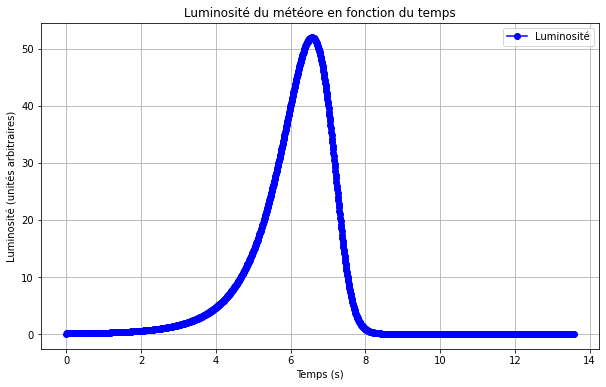

In [38]:
import matplotlib.pyplot as plt

# Assumons que afm_processor.data contient déjà les données après avoir appelé read_int
time = afm_processor.data['time']  # Extrait les valeurs de temps
I = afm_processor.process_dataI(tau, r)  # Vous avez déjà calculé I

# Création du tracé
plt.figure(figsize=(10, 6))  # Définit la taille de la figure
plt.plot(time, I, label='Luminosité', color='blue', marker='o', linestyle='-')  # Tracé de I en fonction du temps

# Ajout de titres et labels
plt.title('Luminosité du météore en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Luminosité (unités arbitraires)')
plt.legend()

# Afficher le tracé
plt.grid(True)  # Ajoute une grille pour une meilleure lisibilité
plt.show()



## Acquisition valeur de luminosité 

## Nouveau Fakeor 

In [39]:
from astropy.table import Table

# Chemin du fichier CSV
file_path = '/Users/ebennat/Desktop/luminosity_data.csv'

# Lecture du fichier CSV
luminosity_data = Table.read(file_path, format='csv')


def find_luminosity_for_time(luminosity_data, t):
    """
    Trouve la valeur de luminosité la plus proche pour un temps donné t.
    """
    # Calcul de la différence absolue entre le temps donné et les temps dans les données
    time_diff = np.abs(luminosity_data['Time'] - t)
    
    # Trouver l'index du temps le plus proche
    min_index = np.argmin(time_diff)
    
    # Retourner la luminosité correspondante
    return luminosity_data['Luminosity'][min_index]



def fakeor2(px_x, px_y, x0, y0, t, a0, luminosity_data):
    a = a0.copy()
    max_luminosity = max(luminosity_data['Luminosity'])#normalisation 
    # Récupérer la luminosité pour le temps donné
    at = find_luminosity_for_time(luminosity_data, t)*255/max_luminosity
    
    for x in np.arange(px_x):
        for y in np.arange(px_y):
            u = np.sqrt(((x - x0) / sig_x)**2 + ((y - y0) / sig_y)**2)
            a[x, y] = (at - a0[x, y]) * np.exp(-u / 2)
    
    a_noise = 0  # Vous pouvez ajouter du bruit si nécessaire
    a = a + a_noise + a0
    return a


# Animation avec données de luminosité extérieures
Les temporalités ici ne sont pas les meme que celles des données utilisées, position d 'apparition aléatoire. Si le code ne marche pas c'est que la position calculées est hors du cadre. Refresh jusqu'a obtention d'une image.  

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 0.1564945226917058 x 1.0 to 0.15428571428571428 x 1.0
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 108x700 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/n9/q1kdqk0n15q2nk1vcb03cxvc0000gn/T/tmpe8z6yx3b/temp.m4v


0.7504934232120904
0.9816790829149397
1.2904321179981586
1.7033372936712774
2.262257864841902
3.056794291116241
4.113527184769353
5.572670107070816
7.600547922391905
10.560892817564971
14.599489361693303
20.304910532835613
28.450844044851266
40.0572125507651
56.45729335859722
79.30801743039886
110.25099652267485
149.91992611340407
195.65396484581183
237.5246218049982
254.84880143112787
222.60172888353173
140.15083445119
55.4326498651989
13.310981117166678
2.4117852617182236
0.42595229556459996
0.09631938119508596
0.02666863990021639
0.008804200268713173
0.0032447303401635704
0.001393257855202939
0.0006566053325918557
0.00032617466247406577
0.00017719383280091357
0.00010151809189282305
6.086199063888712e-05
3.7308848050265865e-05
2.40901875760744e-05
1.602532418670252e-05
1.0941892368639068e-05
7.552280131642459e-06
5.396385635781801e-06
3.929599365884922e-06
3.629783382005797e-06
3.629783382005797e-06
3.629783382005797e-06
3.629783382005797e-06
3.629783382005797e-06
3.629783382005797e-

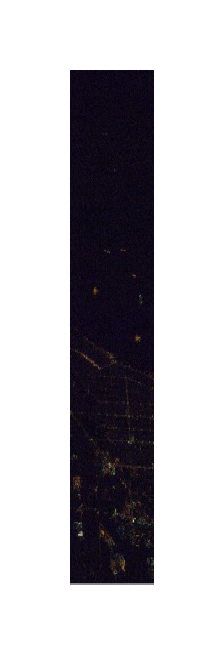

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image

# Charger l'image
img_path = '/Users/ebennat/Downloads/M1Projet/Fakeor/Pictures/ISS016-E-27162.JPG'  
img = np.asarray(Image.open(img_path))

# Paramètres pour le rognage et le point lumineux
crop_width = 100  # Largeur du cadre de rognage (en pixels)
px_x, px_y = 50, 50  # Dimensions du point lumineux
sig_x, sig_y, sig_t, mu, Imax = 2.48, 2.48, 2, 15, 255  # Paramètres pour l'effet lumineux
centre_x = random.randint(0, crop_width - px_x) #Position aléatoire de l'apparition du météore
centre_y = random.randint(0, img.shape[0] - px_y)
#random_frame = random.randint(0, 639) #moment d'appartion aléatoire (pas op avec la lecture d'un fichier ou la luminosité est déjà associée a un temps donné)
vitesse = 5
temps_défilement=0.3

def fakeor(px_x,px_y, x0,y0, t, a0):
    a   = a0.copy()
    max_luminosity = max(luminosity_data['Luminosity']) 
    at=find_luminosity_for_time(luminosity_data, t)*255/max_luminosity #récupère les données d'intensité et calibre avec la valeur max
    
    print(at)

    for x in np.arange(px_x):
        for y in np.arange(px_y):
            u = np.sqrt( ( (x-x0)/sig_x )**2 + ( (y-y0)/sig_y )**2)#forme gaussienne de la répartition de luminosité
            a[x,y] = (at-a0[x,y])*np.exp(-u/2)
            
    a_noise = 0
    
    a = a + a_noise + a0
    return a

# Générer une direction aléatoire pour une mouvement rectiligne uniforme de la météore (en 2D)
angle = random.uniform(0, 2 * np.pi)  # Angle en radians
vitesse_x = vitesse * np.cos(angle)
vitesse_y = vitesse * np.sin(angle)



# Initialisation de la figure
fig, ax = plt.subplots(figsize=(100 / img.shape[1], 436 / img.shape[0]), dpi=700)
ax.set_axis_off()
im = plt.imshow(img[:, 0:crop_width, :], cmap='viridis', interpolation='nearest', aspect='auto')

# Fonction d'initialisation
def init():
    im.set_data(img[:, 0:crop_width, :])
    return [im]

# Fonction d'animation
def animate(i):
    global px_x, px_y, x0, y0,centre_x, centre_y  
    crop_start = i % (img.shape[1] - crop_width)
    cropped_frame = img[:, crop_start:crop_start + crop_width, :].copy()

    # Integration de l'effet lumineux dans l'animation
    if 2 <= i <= 65: #la valeur 65 a été choisie pour eviter que le code tourne inutilment quand la luminosité du météore est trop faible cf graphe luminosité en fonction du temps
        
        #evolution de la position a chaque frame
        centre_x += vitesse_x 
        centre_y += vitesse_y 
        
        a0 = np.zeros_like(cropped_frame)  # Base pour l'effet, ajustée à la taille de cropped_frame
        lumineux = fakeor(px_x, px_y, x0, y0, temps_défilement*i, a0)  # Générez l'effet lumineux
        
        
        #Calcul des coordonnées de début la sous-région ou la météore apparait
        startX = np.clip(int(centre_x - px_x // 2), 0, crop_width - px_x)
        endX = np.clip(startX + px_x, startX + 1, crop_width)

        startY = np.clip(int(centre_y - px_y // 2), 0, img.shape[0] - px_y)
        endY = np.clip(startY + px_y, startY + 1, img.shape[0])

        
        for c in range(3):  # Pour chaque canal de couleur
            cropped_frame[startY:endY, startX:endX, c] = np.clip(cropped_frame[startY:endY, startX:endX, c] + lumineux[:endY-startY, :endX-startX, c], 0, 255)

    # Mettre à jour l'image avec le cadre de rognage et l'effet lumineux
    im.set_array(cropped_frame)
   
    return [im]

# Création et exécution de l'animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=img.shape[1], interval=50, blit=True, repeat=False)
HTML(anim.to_html5_video())


# Animation avec données de luminosité extérieure et temps réaliste 
La météore ne sort pas du cadre et reste immobile si elle se trouve au bord. 

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 0.1564945226917058 x 1.0 to 0.15428571428571428 x 1.0
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 108x700 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/n9/q1kdqk0n15q2nk1vcb03cxvc0000gn/T/tmpeo9e97_c/temp.m4v


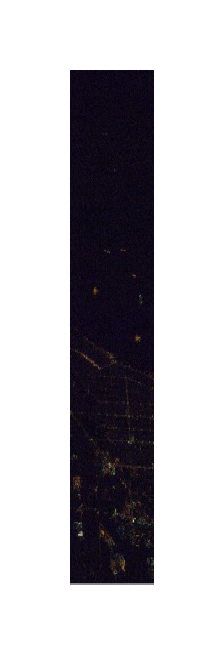

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image

# Charger l'image
img_path = '/Users/ebennat/Downloads/M1Projet/Fakeor/Pictures/ISS016-E-27162.JPG'  
img = np.asarray(Image.open(img_path))

# Paramètres pour le rognage et le point lumineux
crop_width = 100  # Largeur du cadre de rognage (en pixels)
px_x, px_y = 50, 50  # Dimensions du point lumineux
sig_x, sig_y, sig_t, mu, Imax = 1.65, 1.65, 2, 15, 255  # Paramètres pour l'effet lumineux

#centre_x = random.randint(0, crop_width - px_x) #Position aléatoire de l'apparition du météore 
#centre_y = random.randint(0, img.shape[0] - px_y)
#A modifier avec les coordonnées voulu de l'image en pixel.  
centre_x, centre_y = crop_width // 2, img.shape[0] // 2 # Centre du cadre de rognage
vitesse = 15
# Vitesse et direction
angle = random.uniform(0, 2 * np.pi)  # Angle en radians
vitesse_x = vitesse * np.cos(angle)
vitesse_y = vitesse * np.sin(angle)
#random_frame = random.randint(0, 639) #moment d'appartion aléatoire (pas op avec la lecture d'un fichier ou la luminosité est déjà associée a un temps donné)
temps_défilement=0.3

def fakeor(px_x, px_y, centre_x, centre_y, i, a0):
    
    a   = a0.copy()
    max_luminosity = max(luminosity_data['Luminosity']) 
    real_time = i * 0.05  # i * intervalle en secondes
    
    
    at = find_luminosity_for_time(luminosity_data, real_time)*255/max_luminosity
    
    #at=find_luminosity_for_time(luminosity_data, t)*255/max_luminosity #récupère les données d'intensité et calibre avec la valeur max
    
    

    for x in np.arange(px_x):
        for y in np.arange(px_y):
            u = np.sqrt( ( (x-x0)/sig_x )**2 + ( (y-y0)/sig_y )**2)#forme gaussienne de la répartition de luminosité
            a[x,y] = (at-a0[x,y])*np.exp(-u/2)
            
    a_noise = 0
    
    a = a + a_noise + a0
    return a

# Générer une direction aléatoire pour une mouvement rectiligne uniforme de la météore (en 2D)
angle = random.uniform(0, 2 * np.pi)  # Angle en radians
vitesse_x = vitesse * np.cos(angle)
vitesse_y = vitesse * np.sin(angle)



# Initialisation de la figure
fig, ax = plt.subplots(figsize=(100 / img.shape[1], 436 / img.shape[0]), dpi=700)
ax.set_axis_off()
im = plt.imshow(img[:, 0:crop_width, :], cmap='viridis', interpolation='nearest', aspect='auto')

# Fonction d'initialisation
def init():
    im.set_data(img[:, 0:crop_width, :])
    return [im]

# Fonction d'animation
def animate(i):
    global px_x, px_y, x0, y0,centre_x, centre_y  
    crop_start = i % (img.shape[1] - crop_width)
    cropped_frame = img[:, crop_start:crop_start + crop_width, :].copy()

    # Integration de l'effet lumineux dans l'animation
    if 40 <= i <=150 : #60 a été choisie pour eviter que le code tourne inutilment quand la luminosité du météore est trop faible cf graphe luminosité en fonction du temps
        
        
        


        #evolution de la position a chaque frame
        centre_x += vitesse_x 
        centre_y += vitesse_y
        
        a0 = np.zeros_like(cropped_frame)  # Base pour l'effet, ajustée à la taille de cropped_frame
        lumineux = fakeor(px_x, px_y, centre_x, centre_y, i, a0)  # Générez l'effet lumineux
        
        
        #Calcul des coordonnées de début la sous-région ou la météore apparait
        startX = int(max(centre_x - px_x // 2, 0))
        startY = int(max(centre_y - px_y // 2, 0))
        endX = int(min(startX + px_x, crop_width))
        endY = int(min(startY + px_y, cropped_frame.shape[0]))

        
        for c in range(3):  # Pour chaque canal de couleur
            cropped_frame[startY:endY, startX:endX, c] = np.clip(cropped_frame[startY:endY, startX:endX, c] + lumineux[:endY-startY, :endX-startX, c], 0, 255)

    # Mettre à jour l'image avec le cadre de rognage et l'effet lumineux
    im.set_array(cropped_frame)
   
    return [im]

# Création et exécution de l'animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=img.shape[1], interval=50, blit=True, repeat=False)
HTML(anim.to_html5_video())

